# **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **2. Load & Explore the Data**

In [2]:
df = pd.read_csv('/content/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.shape

(20640, 10)

**Check missing values:**

In [7]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


**Distribution of target:**

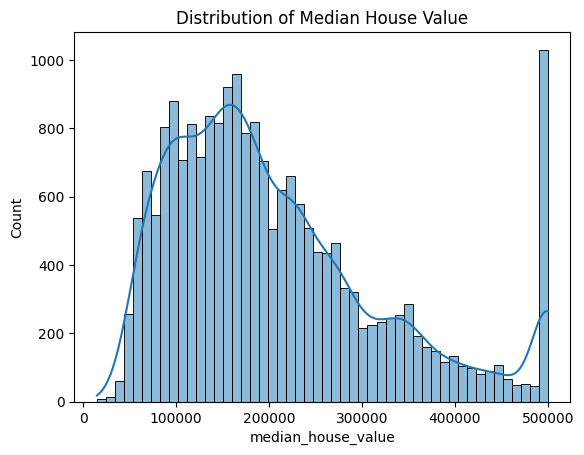

In [8]:
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.show()

# **3. Data Cleaning**

In [9]:
df = df.dropna()

In [10]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# **4. Split Data**

In [11]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train)
print(X_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                  14         4412           924.0   
2057     -119.63     36.64                  33         1036           181.0   
6453     -118.06     34.12                  25         3891           848.0   
4619     -118.31     34.07                  28         2362           949.0   
15266    -117.27     33.04                  27         1839           392.0   
...          ...       ...                 ...          ...             ...   
11397    -117.97     33.72                  24         2991           500.0   
12081    -117.54     33.76                   5         5846          1035.0   
5447     -118.42     34.01                  42         1594           369.0   
866      -122.04     37.57                  12         5719          1064.0   
15948    -122.43     37.73                  52         3602           738.0   

       population  households  median_income  ocean

In [13]:
print(X_train.shape)
print(X_test.shape)

(16346, 12)
(4087, 12)


In [14]:
print(y_train)
print(y_test)

17727    227600
2057     110400
6453     248100
4619     305600
15266    214600
          ...  
11397    273400
12081    160800
5447     335400
866      231200
15948    251800
Name: median_house_value, Length: 16346, dtype: int64
14416    245800
16383    137900
7731     218200
1410     220800
1335     170500
          ...  
8291     500001
6274     157900
2997     100200
13440    127700
14797    133700
Name: median_house_value, Length: 4087, dtype: int64


In [15]:
print(y_train.shape)
print(y_test.shape)

(16346,)
(4087,)


# **5. Build ML Model**

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [17]:
print(y_pred)

[201882.95986765 147279.68214385 207796.60979847 ... 110229.93045317
 137315.7328207  169083.81714047]


# **6. Evaluate Model**

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [19]:
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 69297.7166911303
R2 Score: 0.6488402154431994


# **7. Visualize Predictions**

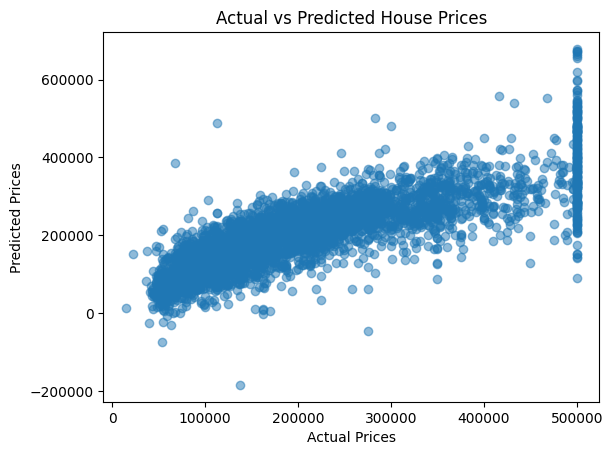

In [20]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()